<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor #добавил

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV #добавил


## Подготовка данных

Запишу данные в переменные.

In [2]:
try:
    data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')
except:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')


Посмотрим на типы данных, и на первые строки тренировочного датасета.

In [3]:
print(data_train.info())
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Проверим тренировочный датасет на пропуски, заполним их медимнными значениями.

In [4]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [5]:
for i in data_train.columns[1:]:
    data_train[i] = data_train[i].fillna(data_train[i].median())

In [6]:
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Проверим также наличие дубликатов.

In [7]:
data_train.duplicated().sum()

0

От пропусков в тренировочном датасете избавились, дубликаты не нашли.

Повторим те же действия для двух других датасетов. 
Чтобы немного автоматизировать это всё дело, напишу функцию включающую в себя все предыдущие шаги.

upd: не работает автоматизация - остаются пустые ячейки. хз почему...

In [8]:
def data_preprocessing(data):
    print(data.info())
    print(data.head())
    print('Кол-во пустых ячеек:')
    print(data.isna().sum())
    data = data.ffill(axis = 0)
    print('Кол-во пустых ячеек после заполнения:')
    print(data.isna().sum().sum())
    print('Кол-во дубликатов:', data.duplicated().sum())
    #На всякий случай напишу условие, при котором дубликаты будут удалятся
    if data.duplicated().sum()>0:
        data.drop_duplicates()
        print('Кол-во дубликатов:', data.duplicated().sum())
    return(data)

In [9]:
data_test = data_preprocessing(data_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [10]:
data_full = data_preprocessing(data_full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
print('Кол-во пустых ячеек:', data_test.isna().sum())

Кол-во пустых ячеек: date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.float

In [12]:
print('Кол-во пустых ячеек:', data_full.isna().sum())

Кол-во пустых ячеек: date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [13]:
data_full = data_full.ffill(axis = 0)
print('Кол-во пустых ячеек после заполнения:', data_full.isna().sum().sum())

Кол-во пустых ячеек после заполнения: 0


Посчитаем эффективность обогащения рассчитывается по формуле
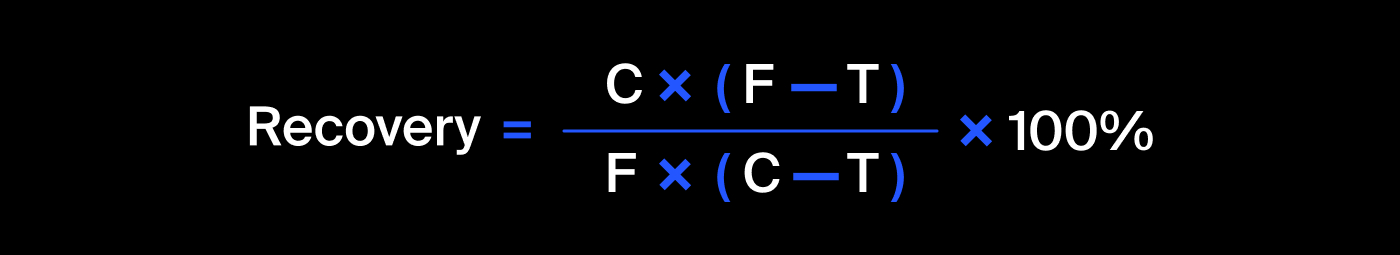

In [14]:
data_train['recovery'] = ((data_train['rougher.output.concentrate_au'] 
                     * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) 
                    / (data_train['rougher.input.feed_au'] 
                       * (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'])) * 100)

print(data_train['recovery'])


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: recovery, Length: 14149, dtype: float64


Найдем MAE между нашими расчётами и значением признака.

In [15]:
MAE = mean_absolute_error(data_train['recovery'], data_train['rougher.output.recovery'])
print('MAE = {:.3}'.format(MAE))

MAE = 9.74e-15


Отклонение небольшое, что может свидетельствовать о том, что метрика <b>recovery</b> посчитана с высокой точностью.

In [16]:
x = list()
for i in list(data_train.columns):
    if i not in list(data_test.columns):
        x.append(i)
x

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке не хватает большого числа столбцов, но, на мой взгляд, достаточно будет включить два основных признака <b>final.output.recovery, rougher.output.recovery</b>

In [17]:
data_test = data_test.merge(data_full[['final.output.recovery', 'rougher.output.recovery', 'date']], 
                            how = 'left', on = 'date')

In [18]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

И с предобработкой - всё.

## Анализ данных

- rougher.input.feed_элемент - значения до флотации
- rougher.output.concentrate_элемент - значения после флотации
- primary_cleaner.output.concentrate_элемент - значения после первичной очистки
- final.output.concentrate_элемент - значения после вторичной очистки

Посмотрим, что происходит с золотом.

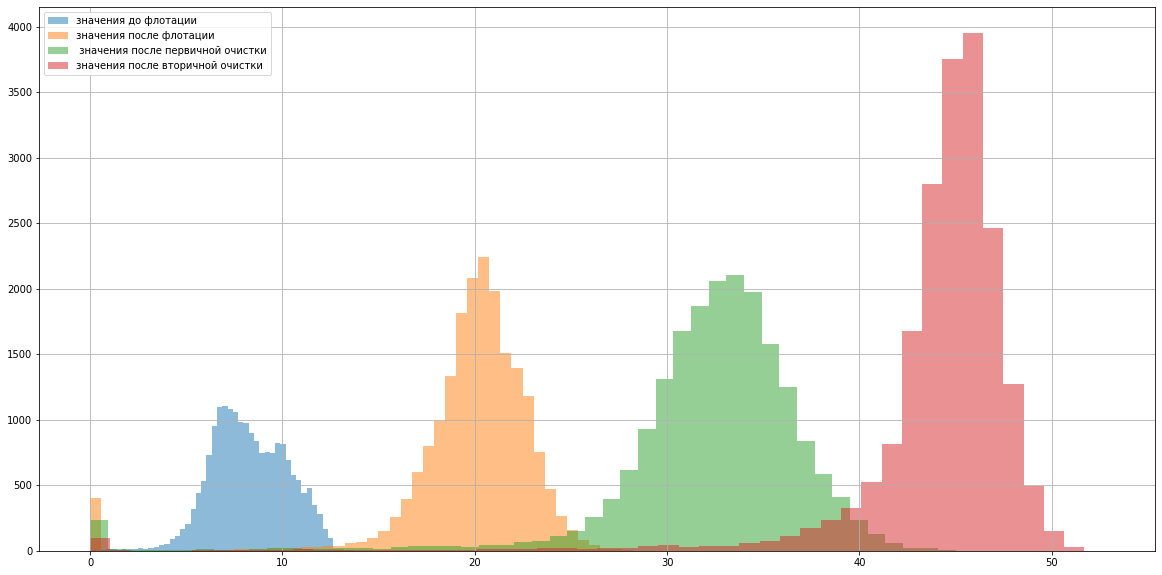

In [19]:
figure(figsize=(20,10))
data_full['rougher.input.feed_au'].hist(bins=50, alpha = 0.5, label = 'значения до флотации');
data_full['rougher.output.concentrate_au'].hist(bins = 50, alpha = 0.5, label = 'значения после флотации');
data_full['primary_cleaner.output.concentrate_au'].hist(bins = 50, alpha = 0.5, label = ' значения после первичной очистки');
data_full['final.output.concentrate_au'].hist(bins = 50, alpha = 0.5, label = 'значения после вторичной очистки');
plt.legend();


Концентрация золота <b>(Aurum)</b> растет с каждым этапом.

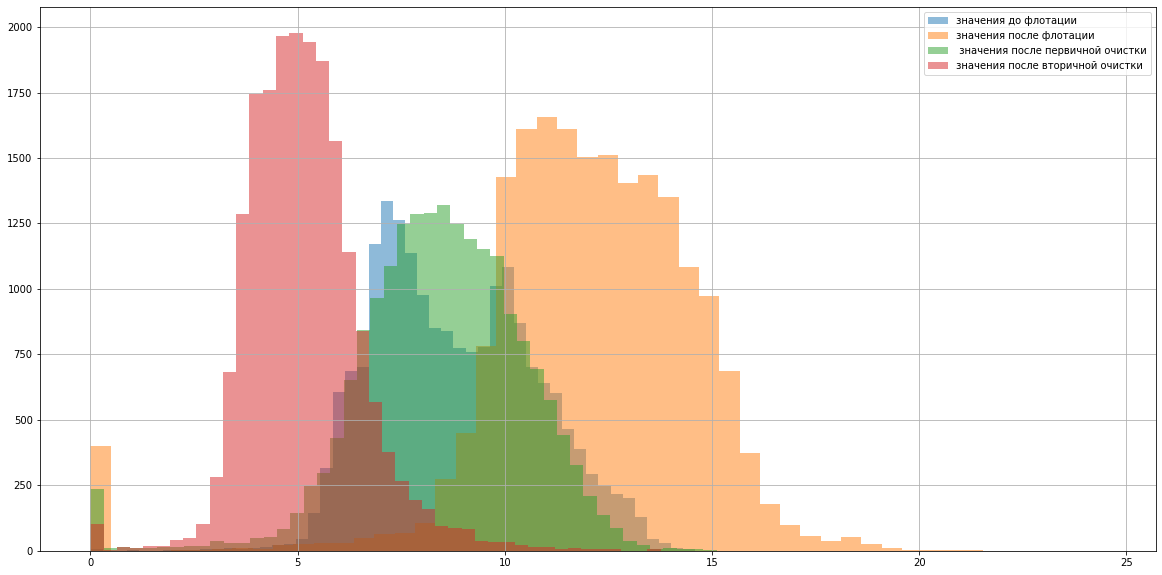

In [20]:
figure(figsize=(20,10))
data_full['rougher.input.feed_ag'].hist(bins=50, alpha = 0.5, label = 'значения до флотации');
data_full['rougher.output.concentrate_ag'].hist(bins = 50, alpha = 0.5, label = 'значения после флотации');
data_full['primary_cleaner.output.concentrate_ag'].hist(bins = 50, alpha = 0.5, label = ' значения после первичной очистки');
data_full['final.output.concentrate_ag'].hist(bins = 50, alpha = 0.5, label = 'значения после вторичной очистки');
plt.legend();

Почему-то не получается вывести на графике данные <b>final.output.concentrate_ag</b>(после вторичной очистки)... 
- upd:пришлось изменять логику заполнения пропусков. Заменял неправильно медианой из-за этого типа данных слетали, появлялись object. Ну и нашел другой метод _ffill_.

Концентрация серебра <b>(Argentum)</b>... с этапами очистки уменьшается.

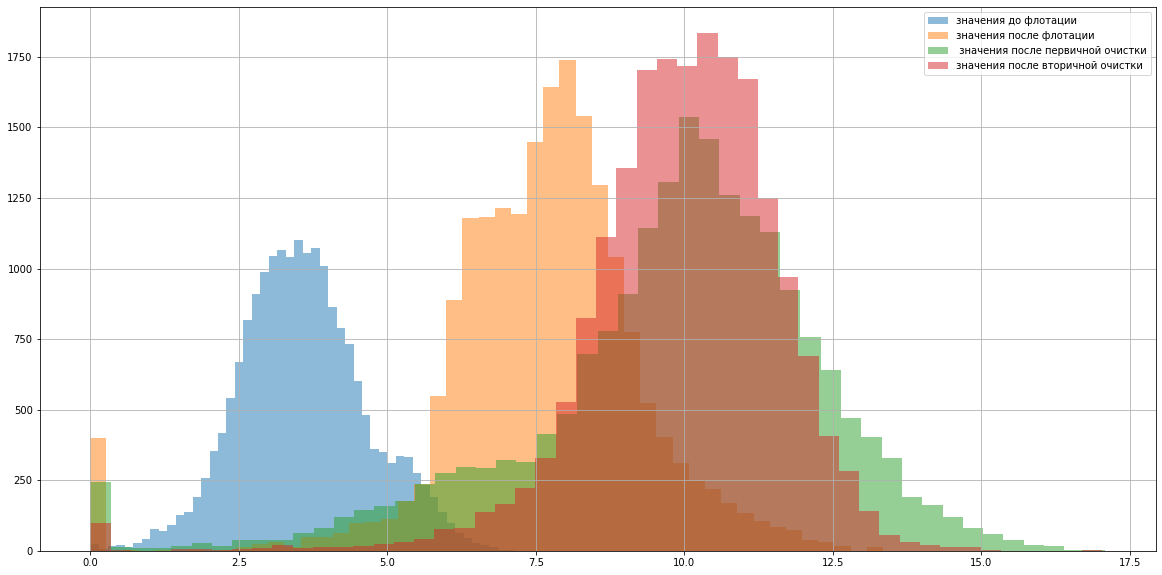

In [21]:
figure(figsize=(20,10))
data_full['rougher.input.feed_pb'].hist(bins=50, alpha = 0.5, label = 'значения до флотации');
data_full['rougher.output.concentrate_pb'].hist(bins = 50, alpha = 0.5, label = 'значения после флотации');
data_full['primary_cleaner.output.concentrate_pb'].hist(bins = 50, alpha = 0.5, label = ' значения после первичной очистки');
data_full['final.output.concentrate_pb'].hist(bins = 50, alpha = 0.5, label = 'значения после вторичной очистки');
plt.legend();

Ситуация со свинцом <b>(Plumbum)</b> cхожа с ситуацией с золотом.

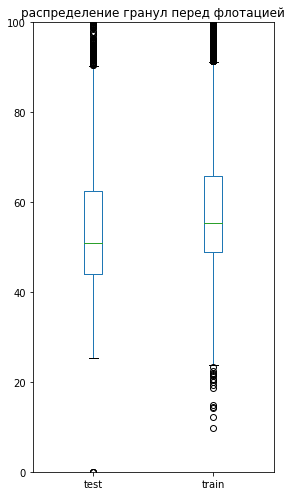

In [22]:
plt.rcParams["figure.figsize"] = [4, 7] 
plt.rcParams["figure.autolayout"] = True 
Boxplot = pd.DataFrame({"test": data_test['rougher.input.feed_size'], "train": data_train['rougher.input.feed_size']}) 
ax = Boxplot[['test', 'train']].plot(kind='box', title='распределение гранул перед флотацией') 
plt.ylim(0,100);
plt.show()

Из графика видно, что в среднем в тренировочной выборке гранулы больше чем в тестовой. Как по мне не критичное различие.

In [23]:
data_test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [24]:
data_train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.062311
std         22.309171
min          9.659576
25%         48.994530
50%         55.373885
75%         65.918384
max        484.967466
Name: rougher.input.feed_size, dtype: float64

В общем-то да.

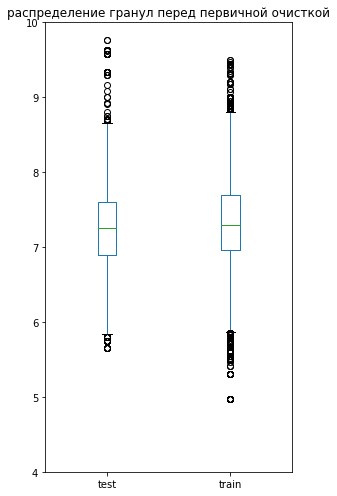

In [25]:

plt.rcParams["figure.figsize"] = [4, 7] 
plt.rcParams["figure.autolayout"] = True 
Boxplot = pd.DataFrame({"test": data_test['primary_cleaner.input.feed_size'], "train": data_train['primary_cleaner.input.feed_size']}) 
ax = Boxplot[['test', 'train']].plot(kind='box', title='распределение гранул перед первичной очисткой') 
plt.ylim(4,10);
plt.show()

Разброс стал заметно меньше.

In [26]:
data_full['sum.rougher.input.feed'] = (data_full['rougher.input.feed_ag'] 
                                       + data_full['rougher.input.feed_au'] 
                                       + data_full['rougher.input.feed_pb'])

data_full['sum.rougher.output.concentrate'] = (data_full['rougher.output.concentrate_ag'] 
                                               + data_full['rougher.output.concentrate_au'] 
                                               + data_full['rougher.output.concentrate_pb'])

data_full['sum.final.output.concentrate'] = (data_full['final.output.concentrate_ag'] 
                                             + data_full['final.output.concentrate_au'] 
                                             + data_full['final.output.concentrate_pb'])

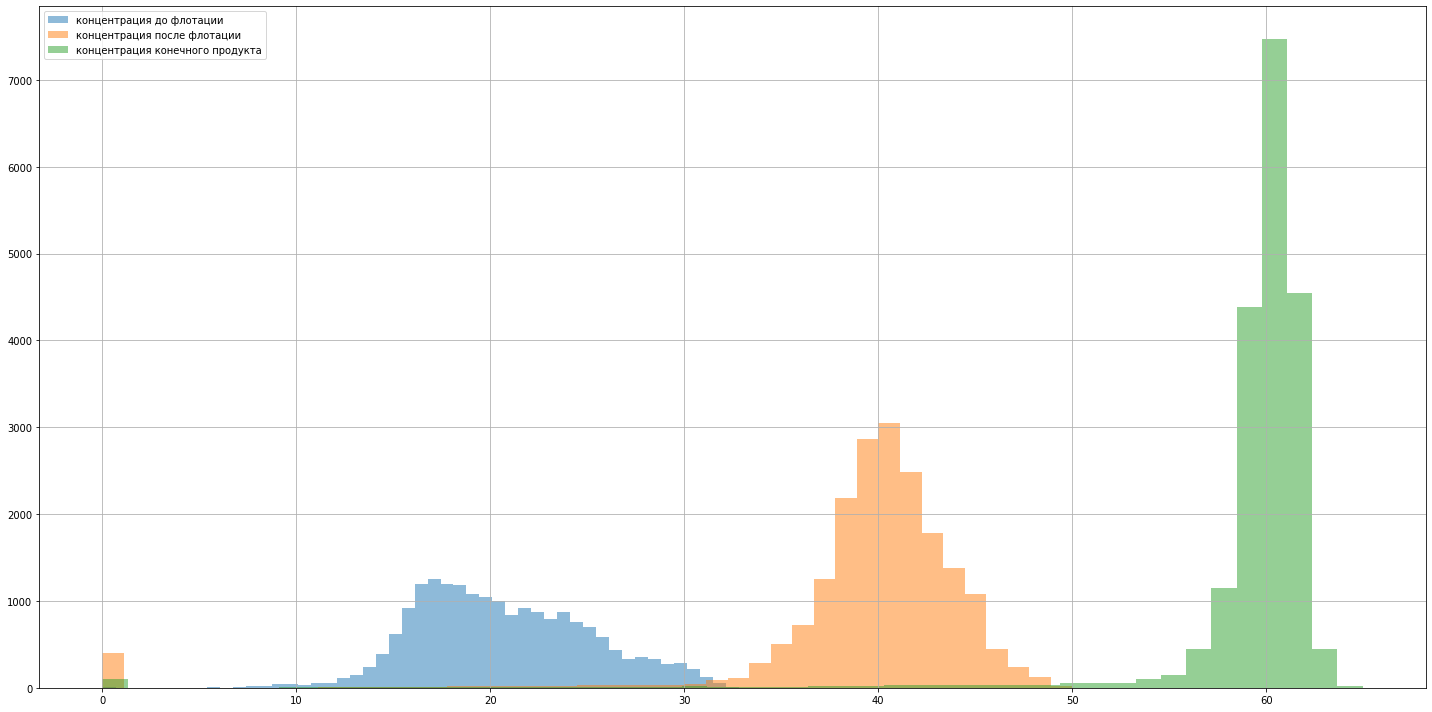

In [27]:
figure(figsize=(20,10))
data_full['sum.rougher.input.feed'].hist(bins=50, alpha = 0.5, label = 'концентрация до флотации');
data_full['sum.rougher.output.concentrate'].hist(bins = 50, alpha = 0.5, label = 'концентрация после флотации');
data_full['sum.final.output.concentrate'].hist(bins = 50, alpha = 0.5, label = 'концентрация конечного продукта');
plt.legend();

На графике видно, что концентрации на каждом рассмотренном этапе растет. (это хорошо)

Думаю, можно удалить около<u>нулевые</u> значения, скорее всего это какая-то ошибка.

In [28]:
data_full = data_full[data_full['sum.rougher.input.feed']>10]
data_full = data_full[data_full['sum.rougher.output.concentrate']>10]
data_full = data_full[data_full['sum.final.output.concentrate']>10]

Еще раз посмотрим на график:

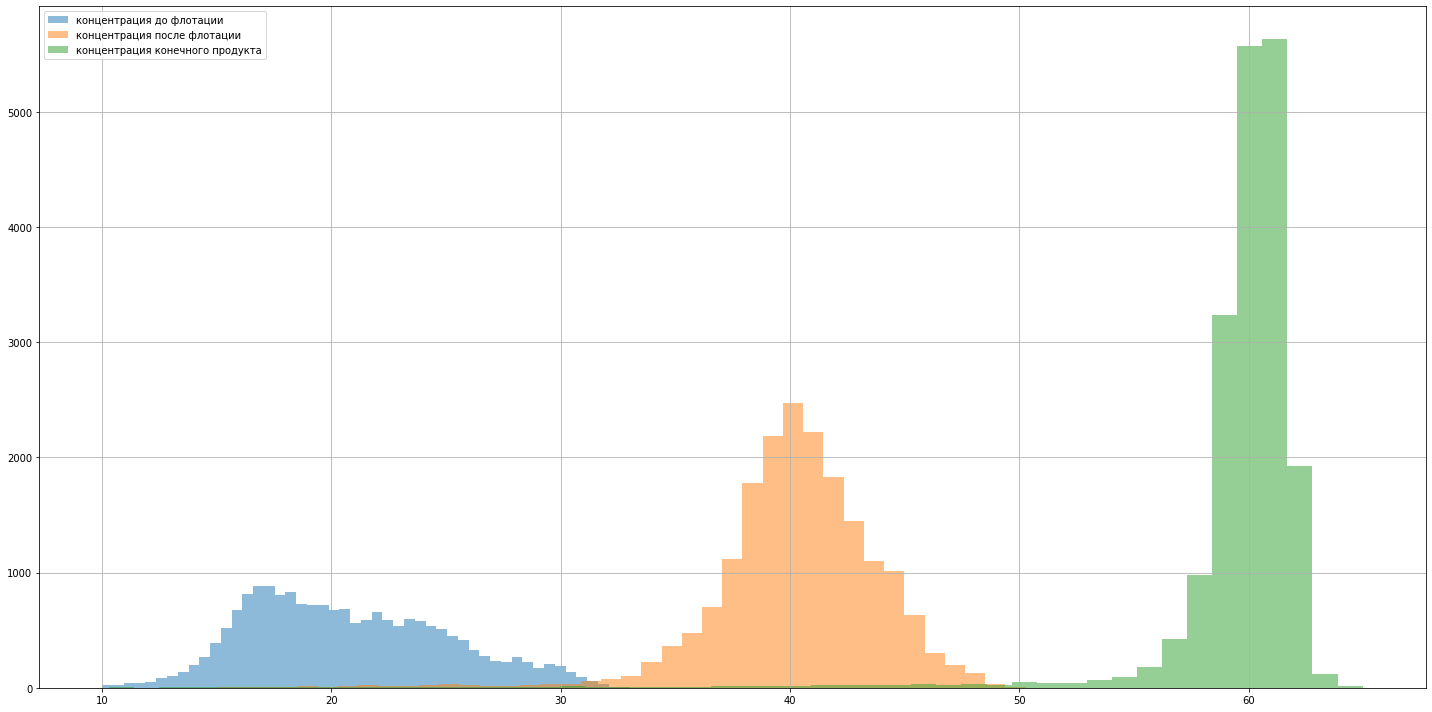

In [29]:
figure(figsize=(20,10))
data_full['sum.rougher.input.feed'].hist(bins=50, alpha = 0.5, label = 'концентрация до флотации');
data_full['sum.rougher.output.concentrate'].hist(bins = 50, alpha = 0.5, label = 'концентрация после флотации');
data_full['sum.final.output.concentrate'].hist(bins = 50, alpha = 0.5, label = 'концентрация конечного продукта');
plt.legend();

In [30]:
data_train = data_train[data_test.columns]

Убрали столбцы, которые не используются в тестовой выборке (в них нет необходимости).

## Модель

Напишем функцию для вычисления итоговой sMAPE.
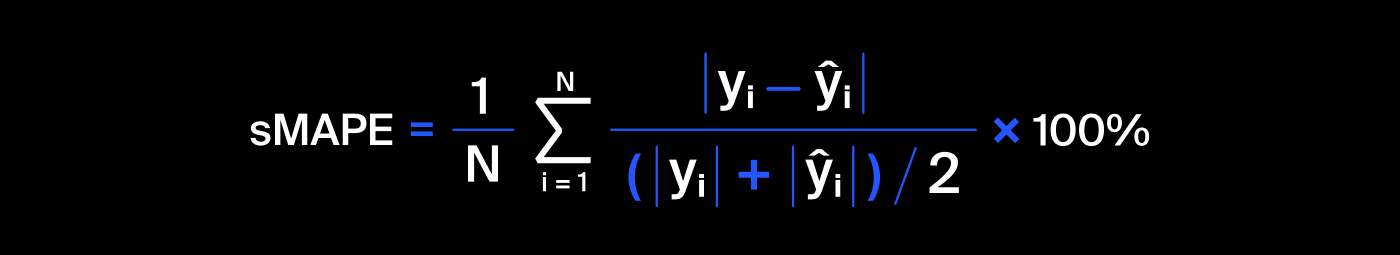
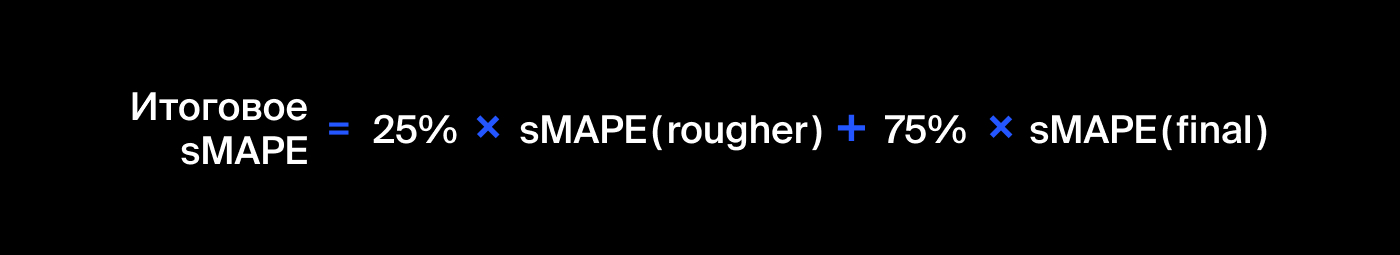

In [31]:
def fun_sMAPE(target, predicrtion):
    sMAPE = (((abs(target - predicrtion)/ (abs(target) + (abs(predicrtion))/ 2))* 100) / len(target)).sum()

    return sMAPE

In [32]:
features_rougher = []
for columns in data_test.columns:
    if 'rougher' in columns:
        features_rougher.append(columns)

In [33]:
train_features_rougher = data_train[features_rougher].drop(['rougher.output.recovery'],axis = 1)
train_target_rougher = data_train['rougher.output.recovery']


train_features_final = data_train.drop(['rougher.output.recovery','final.output.recovery','date'], axis = 1)
train_target_final = data_train['final.output.recovery']


test_features_rougher = data_test[features_rougher].drop(['rougher.output.recovery'], axis = 1)
test_target_rougher = data_test['rougher.output.recovery']


test_features_final = data_test[data_test.columns].drop(['rougher.output.recovery','final.output.recovery','date'], axis = 1)
test_target_final = data_test['final.output.recovery']

In [34]:
def cross_val(model, features, target):
    scores = cross_val_score(model, features, target, scoring = make_scorer(fun_sMAPE, greater_is_better = False), cv = 5, n_jobs = -1)
    smape_res = np.mean(scores)
    return smape_res

С _cross_val_score_ подсказали, но я всё равно не совсем понимаю, как это работает

In [35]:
def model_calculation(model):
    smape_rougher = cross_val(model, train_features_rougher, train_target_rougher)
    smape_final = cross_val(model, train_features_final, train_target_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final
    print('Оценка по кросс-валидации на rougher', abs(smape_rougher))
    print('Оценка качества по кросс-валидации на final', abs(smape_final))
    print('Итоговая оценка качества по кросс-валидации', abs(smape_end))

In [36]:
model = RandomForestRegressor(random_state = 12345)
model_calculation(model)

Оценка по кросс-валидации на rougher 10.745057876850584
Оценка качества по кросс-валидации на final 8.05090642999184
Итоговая оценка качества по кросс-валидации 8.724444291706526


In [37]:
model = DecisionTreeRegressor()
model_calculation(model)

Оценка по кросс-валидации на rougher 16.039751842265684
Оценка качества по кросс-валидации на final 13.72613120164318
Итоговая оценка качества по кросс-валидации 14.304536361798807


In [38]:
model = LinearRegression()
model_calculation(model)

Оценка по кросс-валидации на rougher 9.410422992834487
Оценка качества по кросс-валидации на final 8.836477513272275
Итоговая оценка качества по кросс-валидации 8.979963883162828


In [39]:
model = DummyRegressor()
model_calculation(model)

Оценка по кросс-валидации на rougher 9.571549863265428
Оценка качества по кросс-валидации на final 8.02681546929556
Итоговая оценка качества по кросс-валидации 8.412999067788027


Смею предположить, что наиболее эффективной является модель <b>RandomForestRegressor</b>

Из-за того что модель обучается крайне долго мой компуктер не вывезет перебирать его глубину и количество деревьем... поэтому оставляю как есть.

In [43]:
parametrs = {'max_depth': range (2, 10, 2),
            'n_estimators': range(1, 51, 10)}

model = RandomForestRegressor(random_state = 12345)
grid = GridSearchCV(model, parametrs, cv = 5, scoring = make_scorer(fun_sMAPE, greater_is_better = False))
grid.fit(train_features_rougher, train_target_rougher)
grid.best_params_

{'max_depth': 4, 'n_estimators': 11}

In [44]:
def model_training(model):
    model.fit(train_features_rougher, train_target_rougher)
    predictions_rougher = model.predict(test_features_rougher)
    
    model.fit(train_features_final, train_target_final)
    predictions_final = model.predict(test_features_final)
    
    smape_rougher = fun_sMAPE(predictions_rougher, test_target_rougher)
    smape_final = fun_sMAPE(predictions_final, test_target_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final
    
    print('Оценка на rougher', abs(smape_rougher))
    print('Оценка качества на final', abs(smape_final))
    print('Итоговая оценка качества', abs(smape_end))

In [45]:
model = RandomForestRegressor(random_state = 12345, max_depth = 4, n_estimators = 11)
model_training(model)

Оценка на rougher 5.747379264928226
Оценка качества на final 5.98540390210078
Итоговая оценка качества 5.925897742807642


In [46]:
model = DummyRegressor()
model_training(model)

Оценка на rougher 6.314151362268114
Оценка качества на final 6.585793450405845
Итоговая оценка качества 6.517882928371412


## Выводы

- Провел предобработку данных: изучили данные, заполнили пропуски.
- Изучили содержание драгоценных металлов в процессе их очистки от примесей, построили графики на различных этапах
- Исследовали суммарную концентрацию основных веществ (золото, серебро, свинец): в сырье, в черновом и финальном концентратах - в целом она возрастает.
- Написали функцию рассчет эффективности обогащения
- Обчили несколько моделей и выбрали оптимальную. (как я понял - чем ниже показатели тем лучше)